In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df.shape

(1797, 64)

In [7]:
# here pixel_x_y means x row and yth column. 0, 1,2 are different digits. One row corresponds to digit.

In [8]:
digits.data[2] #it is 8*8 matrix representing pixel values of a particular digit.

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, digits.target, test_size = 0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(x_test, y_test)

0.9833333333333333

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]], dtype=int64)

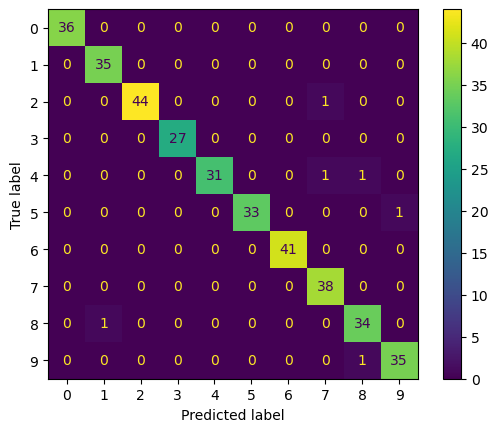

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        35
           2       1.00      0.98      0.99        45
           3       1.00      1.00      1.00        27
           4       1.00      0.94      0.97        33
           5       1.00      0.97      0.99        34
           6       1.00      1.00      1.00        41
           7       0.95      1.00      0.97        38
           8       0.94      0.97      0.96        35
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

